In [12]:
from osgeo import gdal, ogr
import os

In [19]:
# Reference: https://gis.stackexchange.com/a/222454
# A script to rasterise a shapefile to the same projection & pixel resolution as a reference image.
from osgeo import ogr, gdal
import subprocess
DATA_DIR = "supervised_data"
input_label_mapping = {
    # "PNW lakes/PNW_20230612_1_1.tif": "PNW lakes/PNW_NV5_06122023_1_1/PNW_NV5_06122023_1_1_AJT_manualwatermask.shp",
    # "PNW lakes/PNW_20230612_3_4.tif": "PNW lakes/PNW_NV5_06122023_3_4/PNW_NV5_06122023_3_4_AJT_manualwatermask.shp",
    # 'Willamette/Willamette_20230606_06.tif': "Willamette/WM_20230606_06/WM_NV5_06062023_06_WT_AT_manualwatermask.shp",
    # 'Willamette/Willamette_20230606_07.tif': "Willamette/WM_20230606_07/WM_NV5_06062023_07_AJT_manualwatermask.shp",
    'Willamette/Willamette_20230606_08.tif': "Willamette/WM_20230606_08/WM_NV5_06062023_08_AJT_manualwatermask.shp",
}
# for k,v in input_label_mapping.items():
# InputVector = os.path.join(DATA_DIR, k)
# RefImage = os.path.join(DATA_DIR, v)
# print(InputVector)
# print(RefImage)
InputVector = 'supervised_data/Willamette/WM_20230606_08/WM_NV5_06062023_08_AJT_manualwatermask.shp'

RefImage = 'supervised_data/Willamette/Willamette_20230606_08.tif'
OutputImage = RefImage.replace(".tif", "_label.tif")

gdalformat = 'GTiff'
datatype = gdal.GDT_Byte
burnVal = 1 #value for the output image pixels
##########################################################
# Get projection info from reference image
Image = gdal.Open(RefImage, gdal.GA_ReadOnly)

# Open Shapefile
Shapefile = ogr.Open(InputVector)
Shapefile_layer = Shapefile.GetLayer()

# Rasterise
print("Rasterising shapefile...")
Output = gdal.GetDriverByName(gdalformat).Create(OutputImage, Image.RasterXSize, Image.RasterYSize, 1, datatype, options=['COMPRESS=DEFLATE'])
Output.SetProjection(Image.GetProjectionRef())
Output.SetGeoTransform(Image.GetGeoTransform()) 

# Write data to band 1
Band = Output.GetRasterBand(1)
Band.SetNoDataValue(0)
gdal.RasterizeLayer(Output, [1], Shapefile_layer, burn_values=[burnVal])

# Close datasets
Band = None
Output = None
Image = None
Shapefile = None

# # Build image overviews
# subprocess.call("gdaladdo --config COMPRESS_OVERVIEW DEFLATE "+OutputImage+" 2 4 8 16 32 64", shell=True)
# print("Done.")

Rasterising shapefile...


In [3]:
import rasterio
fp = "Result.tif"
dataset = rasterio.open(fp)
data = dataset.read()

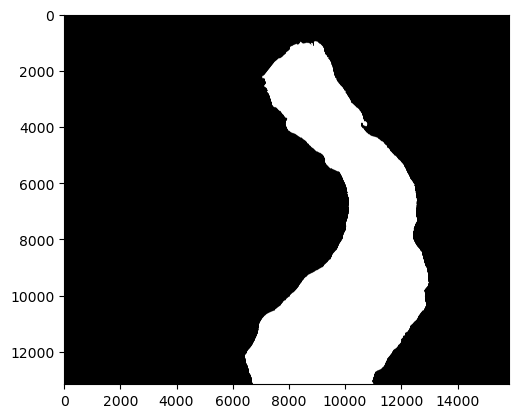

In [7]:

from matplotlib import pyplot as plt
plt.imshow(data[0,:,:], cmap="gray")

In [38]:
import rasterio
from PIL import Image 
import cv2
from matplotlib import pyplot as plt
import os
import glob
import geopandas as gpd

In [31]:
DATA_DIR = "supervised_data"
input_label_mapping = {
    "PNW lakes/PNW_20230612_1_1.tif": "PNW lakes/PNW_NV5_06122023_1_1/PNW_NV5_06122023_1_1_AJT_manualwatermask.shp",
    "PNW lakes/PNW_20230612_3_4.tif": "PNW lakes/PNW_NV5_06122023_3_4/PNW_NV5_06122023_3_4_AJT_manualwatermask.shp",
    'Willamette/Willamette_20230606_06.tif': "Willamette/WM_20230606_06/WM_NV5_06062023_06_WT_AT_manualwatermask.shp",
    'Willamette/Willamette_20230606_07.tif': "Willamette/WM_20230606_07/WM_NV5_06062023_07_AJT_manualwatermask.shp",
    'Willamette/Willamette_20230606_08.tif': "Willamette/WM_20230606_08/WM_NV5_06062023_08_AJT_manualwatermask.shp",
}

(['supervised_data/PNW lakes/PNW_20230612_1_1.tif',
  'supervised_data/PNW lakes/PNW_20230612_3_4.tif',
  'supervised_data/Willamette/Willamette_20230606_06.tif',
  'supervised_data/Willamette/Willamette_20230606_07.tif',
  'supervised_data/Willamette/Willamette_20230606_08.tif'],
 [])

In [40]:
fp = "PNW lakes/PNW_NV5_06122023_1_1/PNW_NV5_06122023_1_1_AJT_manualwatermask.shp"
# dataset = rasterio.open(os.path.join(DATA_DIR, fp))
# data = dataset.read()

data = gpd.read_file(os.path.join(DATA_DIR, fp))

In [46]:
data["geometry"].values

<GeometryArray>
[<POLYGON ((569036.78 5272340.413, 567998.813 5272340.056, 568680.843 5273597...>,
 <POLYGON ((569617.683 5276136.287, 569236.36 5275834.867, 568597.729 5275603...>,
 <POLYGON ((568597.729 5275603.897, 569236.36 5275834.867, 568680.843 5273597...>]
Length: 3, dtype: geometry